## Important Things to Notice before we start our project

#### Important column names and their description

In [111]:
#idhogar ==> is an id which is common to all members of a single family
#Target ==> Target class(Poverty level contains 4 class[1,2,3,4])
#parentesco1 ==> is a family head identifier(0 means not a family head 1 means family head)


## Imports

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
import random
random.seed(10)

## Starting the project

In [113]:
inp_train_data = pd.read_csv("train.csv")  # ------------Reading input train data
inp_test_data = pd.read_csv("test.csv")  # ------------Reading input test data

In [114]:
inp_train_data.shape, inp_test_data.shape  # -------------Check shape of train and test 

((9557, 143), (23856, 142))

In [115]:
inp_train_data.head() # ---------------data looks

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


#### Check null values per column

In [116]:
null_counts =inp_train_data.isnull().sum()  # -------------------Check for null values per column at once
null_counts[null_counts>0]

v2a1         6860
v18q1        7342
rez_esc      7928
meaneduc        5
SQBmeaned       5
dtype: int64

## Target values

In [117]:
inp_train_data.Target.unique()   # ---------------Check for unique values in Target

array([4, 2, 3, 1], dtype=int64)

In [118]:
## So there are 4 poverty level class

## Bias check

#### Lets draw people count output category wise

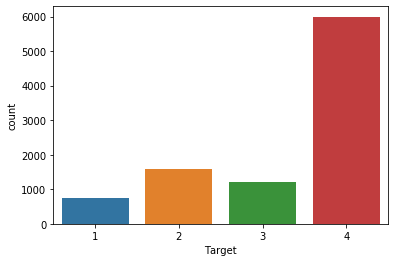

In [119]:

sns.countplot(inp_train_data.Target)
#inp_train_data.Target

In [120]:
## Lets see no of people in each class
np.bincount(inp_train_data.Target)

array([   0,  755, 1597, 1209, 5996], dtype=int64)

#### Data is biased
#### Because class 4 have 62% of data

#### 5996/(755+1597+1209+5996)

## Checking wheather all members of the house have same poverty level

#### Idhogar represents id of a family
#### That is similar for every family member
#### So we will check persons with same idhogar if
#### They have same target label then ok they have same poverty level(match)
#### Otherwise Count them as mismatch


In [121]:
## Total Family count
len(np.unique(inp_train_data.idhogar))  # Since idhogar is common for a family

2988

In [122]:
def poverty_level_check(inp_data):
    """
    1. if people with same idhogar will have different poverty level then mismatch
    2. Will store total families with poverty mismatch as 0
    3. Will store total families with poverty match as 1
    4. variable "poverty_mismatch_count"
    
    """
    poverty_mismatch_count = [[],[]]
    for id_h in np.unique(inp_data.idhogar):
        temp = inp_data[inp_data.idhogar == id_h]
        if(len(temp.Target.unique())>1): # if idhogar
            poverty_mismatch_count[0].append(0)
            #print("temp",temp.Target.unique(), "Unmatched")
            
        else:
            poverty_mismatch_count[1].append(1)
            #pass
            #print("temp",temp.Target.unique(), "Matched")
    return poverty_mismatch_count
        #break

In [123]:
poverty_match_count = poverty_level_check(inp_train_data)

In [124]:
## Total families is equal total unique hogar ids

total_families = np.unique(inp_train_data.idhogar)
total_families.shape[0]

2988

In [125]:
print("total families with poverty_mismatch_count ==>", len(poverty_match_count[0]))
print("total families with poverty_match_count ==>", len(poverty_match_count[1]))


total families with poverty_mismatch_count ==> 85
total families with poverty_match_count ==> 2903


Text(0, 0.5, 'No of families')

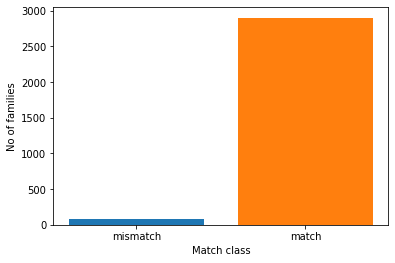

In [126]:
# Visually we can see mismatch vs match

plt.bar("mismatch",len(poverty_match_count[0]))
plt.bar("match",len(poverty_match_count[1]))
plt.xlabel("Match class")
plt.ylabel("No of families")

## House with and without family head

#### parentesco1 = 1 represents family head
#### every head will have unique idhogar
#### the remaining unique idhogar ids will be the no of houses without head

In [127]:
families_with_head= inp_train_data[inp_train_data.parentesco1 ==1]

In [128]:
no_of_families_with_head = families_with_head.idhogar.nunique()#.shape, families_without_head.shape
no_of_families_with_head

2973

In [129]:
no_of_families_without_head = 0
for id_h in inp_train_data.idhogar.unique():
    if(id_h in families_with_head.idhogar.unique()):
        pass
    else:
        no_of_families_without_head+=1
    

In [130]:
no_of_families_without_head

15

In [131]:
print("no_of_families_with_head ==>", no_of_families_with_head)
print("no_of_families_without_head ==>", no_of_families_without_head)

no_of_families_with_head ==> 2973
no_of_families_without_head ==> 15


Text(0, 0.5, 'family head count')

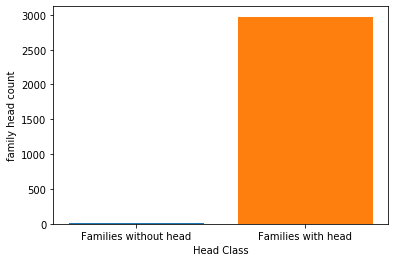

In [132]:
# Visually we can see family without head vs family with head count

plt.bar("Families without head",no_of_families_without_head)
plt.bar("Families with head",no_of_families_with_head)
plt.xlabel("Head Class")
plt.ylabel("family head count")

# Transforming data for modelling


#### Setting Poverty Level of mismatch poverty level families

In [133]:
# Total mismatches
len(poverty_match_count[0])

85

#### we will work on a temp train data so that original dataframe is not affected
#### Since Target column does not contain null values we can refer it to form temp Variable

In [134]:


temp_train_data = inp_train_data[inp_train_data.Target !="nan"]

inp_train_data.shape, temp_train_data.shape

# temp_train_data is a dataframe that is exact same as train dataframe
# we will do changes in this dataframe

C:\python\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


((9557, 143), (9557, 143))

##### Make a list of Number of families with head

In [135]:
list_idhogar_with_head= list(inp_train_data[inp_train_data.parentesco1 ==1].idhogar)
len(list_idhogar_with_head)

2973

#### If a family have unbalaced poverty and has a family head
#### Poverty level of all family heads will set to family head poverty level
#### Else we will set to the level which have maximum occurance in the family

#### Before there are 85 families with poverty mismatch

In [136]:
poverty_match_count = poverty_level_check(temp_train_data)
print(len(poverty_match_count[0]))

85


In [137]:
def setting_poverty_level(inpp_data):

    #poverty_mismatch_count = [[],[]]
    count = 0
    for id_h in np.unique(inpp_data.idhogar):
        count+=1
        temp = inpp_data[inpp_data.idhogar == id_h]
        if(len(temp.Target.unique())>1):
            
            if(id_h in list_idhogar_with_head):
                #print("here")
                #print("target values before:", temp[temp.parentesco1 ==1].Target)
                inpp_data.loc[inpp_data.idhogar == id_h,"Target"]  = int(temp[temp.parentesco1 ==1]["Target"].values[0])
                #print("target values After: ", temp_train_data[temp_train_data.idhogar == id_h].Target)
            else:

                x = temp.Target.value_counts()
                #print(x)
                x.index[0]
                #print(x)

                inpp_data.loc[inpp_data.idhogar == id_h,"Target"] = x.index[0]
                print("Families withot head")
    #print(count)
    return inpp_data
            
                
                

In [138]:
#setting_poverty_level()

In [139]:
temp_train_data =  setting_poverty_level(temp_train_data)

#### Lets check mismatch count after setting poverty level

In [140]:
poverty_match_count = poverty_level_check(temp_train_data)
print(len(poverty_match_count[0]))

0


#### By Observation 
#### Every family that has unbalace poverty
#### Also have family head

# Null Values in each Column

In [141]:
null_value_each_col = temp_train_data.isnull().sum()
type(null_value_each_col)

pandas.core.series.Series

In [142]:
null_value_each_col = null_value_each_col[null_value_each_col>0]
null_value_each_col

v2a1         6860
v18q1        7342
rez_esc      7928
meaneduc        5
SQBmeaned       5
dtype: int64

# Remove Null Value Row of Target Variable

In [143]:
inp_train_data.Target.isnull().any()

False

#### No null value in target 
#### So we will not remove any row

In [144]:
(temp_train_data.dtypes).unique()

array([dtype('O'), dtype('float64'), dtype('int64')], dtype=object)

#### So we have total three types of data in our input
#### Object type, Int type, Float type
#### We will change object type to Int or float for modeling

In [145]:
# Datatype of each column
(temp_train_data.dtypes).value_counts()

int64      130
float64      8
object       5
dtype: int64

#### Five columns are there that has to be transformed

In [146]:
# We have to transform 5 columns for training of model

column_type = temp_train_data.dtypes =='object'
column_type[column_type == True]

Id            True
idhogar       True
dependency    True
edjefe        True
edjefa        True
dtype: bool

#### We will transform train and Test data both so that they are alike

#### Drop  id's because it does not contribute much to prediction

In [147]:
temp_train_data.drop(['Id','idhogar'], axis =1, inplace = True)
inp_test_data.drop(['Id','idhogar'], axis =1, inplace = True)

#### Transform dependency column

In [148]:
print(temp_train_data.dependency.unique())
print(inp_test_data.dependency.unique())


['no' '8' 'yes' '3' '.5' '.25' '2' '.66666669' '.33333334' '1.5'
 '.40000001' '.75' '1.25' '.2' '2.5' '1.2' '4' '1.3333334' '2.25'
 '.22222222' '5' '.83333331' '.80000001' '6' '3.5' '1.6666666' '.2857143'
 '1.75' '.71428573' '.16666667' '.60000002']
['.5' 'no' '8' 'yes' '.25' '2' '.33333334' '.375' '.60000002' '1.5' '.2'
 '.75' '.66666669' '3' '.14285715' '.40000001' '.80000001' '1.6666666'
 '.2857143' '1.25' '2.5' '5' '.85714287' '1.3333334' '.16666667' '4'
 '.125' '.83333331' '2.3333333' '7' '1.2' '3.5' '2.25' '3.3333333' '6']


In [149]:
##   If we supply errors ='coerce' it will put a nan of object types
##   Further we have deal with it

temp_train_data.dependency = pd.to_numeric(temp_train_data.dependency, errors ='coerce') 
inp_test_data.dependency = pd.to_numeric(inp_test_data.dependency, errors ='coerce') 

In [150]:
temp_train_data.dependency.unique()

array([       nan, 8.        , 3.        , 0.5       , 0.25      ,
       2.        , 0.66666669, 0.33333334, 1.5       , 0.40000001,
       0.75      , 1.25      , 0.2       , 2.5       , 1.2       ,
       4.        , 1.3333334 , 2.25      , 0.22222222, 5.        ,
       0.83333331, 0.80000001, 6.        , 3.5       , 1.6666666 ,
       0.2857143 , 1.75      , 0.71428573, 0.16666667, 0.60000002])

#### Transform edjefe column

In [151]:
print(temp_train_data.edjefe.unique())
print(inp_test_data.edjefe.unique())

['10' '12' 'no' '11' '9' '15' '4' '6' '8' '17' '7' '16' '14' '5' '21' '2'
 '19' 'yes' '3' '18' '13' '20']
['no' '16' '10' '6' '11' '8' '13' '14' '5' '3' '9' '17' '15' '7' '21' '4'
 '12' '2' '20' 'yes' '19' '18']


In [152]:
temp_train_data.edjefe = pd.to_numeric(temp_train_data.edjefe, errors ='coerce')
inp_test_data.edjefe = pd.to_numeric(inp_test_data.edjefe, errors ='coerce')

In [153]:
print(temp_train_data.edjefe.unique())
print(inp_test_data.edjefe.unique())

[10. 12. nan 11.  9. 15.  4.  6.  8. 17.  7. 16. 14.  5. 21.  2. 19.  3.
 18. 13. 20.]
[nan 16. 10.  6. 11.  8. 13. 14.  5.  3.  9. 17. 15.  7. 21.  4. 12.  2.
 20. 19. 18.]


#### Transform edjefa column

In [154]:
print(temp_train_data.edjefa.unique())
print(inp_test_data.edjefa.unique())

['no' '11' '4' '10' '9' '15' '7' '14' '13' '8' '17' '6' '5' '3' '16' '19'
 'yes' '21' '12' '2' '20' '18']
['17' 'no' '11' '14' '10' '15' '9' '6' '8' '3' '2' '5' '16' '12' 'yes' '7'
 '13' '21' '4' '19' '18' '20']


In [155]:
temp_train_data.edjefa = pd.to_numeric(temp_train_data.edjefa, errors ='coerce')
inp_test_data.edjefa = pd.to_numeric(inp_test_data.edjefa, errors ='coerce')


In [156]:
print(temp_train_data.edjefa.unique())
print(inp_test_data.edjefa.unique())

[nan 11.  4. 10.  9. 15.  7. 14. 13.  8. 17.  6.  5.  3. 16. 19. 21. 12.
  2. 20. 18.]
[17. nan 11. 14. 10. 15.  9.  6.  8.  3.  2.  5. 16. 12.  7. 13. 21.  4.
 19. 18. 20.]


#### Lets fill the NAN values to zero 

In [157]:
## For train

temp_train_data.dependency.fillna(0, inplace = True)
temp_train_data.edjefe.fillna(0, inplace = True)
temp_train_data.edjefa.fillna(0, inplace = True)

# For Test

inp_test_data.dependency.fillna(0, inplace = True)
inp_test_data.edjefe.fillna(0, inplace = True)
inp_test_data.edjefa.fillna(0, inplace = True)


In [158]:
temp_train_data.isnull().any()

v2a1                True
hacdor             False
rooms              False
hacapo             False
v14a               False
                   ...  
SQBovercrowding    False
SQBdependency      False
SQBmeaned           True
agesq              False
Target             False
Length: 141, dtype: bool

#### Check columns with NAN values and change them to zero

In [159]:
na_val = temp_train_data.isnull().sum()
na_val[na_val>0]

v2a1         6860
v18q1        7342
rez_esc      7928
meaneduc        5
SQBmeaned       5
dtype: int64

In [160]:
temp_train_data.v18q1.fillna(0, inplace = True)
temp_train_data.v2a1.fillna(0, inplace = True)
temp_train_data.rez_esc.fillna(0, inplace = True)
temp_train_data.meaneduc.fillna(0, inplace = True)
temp_train_data.SQBmeaned.fillna(0, inplace = True)

# For test

inp_test_data.v18q1.fillna(0, inplace = True)
inp_test_data.v2a1.fillna(0, inplace = True)
inp_test_data.rez_esc.fillna(0, inplace = True)
inp_test_data.meaneduc.fillna(0, inplace = True)
inp_test_data.SQBmeaned.fillna(0, inplace = True)

In [161]:
temp_train_data.isnull().any().value_counts()

False    141
dtype: int64

#### Lets Seperate Features and output classes

In [162]:
features = temp_train_data.drop("Target", axis =1)
output_class = temp_train_data.Target

In [163]:
from sklearn.model_selection import train_test_split
train_xxx, CV_xxx, train_yyy, CV_yyy = train_test_split(features, output_class, test_size =.2) 

## Model Making

### We will make model in three stages
### 1st =>on 20% cross validation
### 2nd =>on optimal parameters extracted using k fold and grid cv
### 3rd =>apply these parameters on whole train dataset
### We =>will predict our test data on all above three models and draw countplots

#### 1st Model :
#### We will take 80 % as train set and 20 % as cross validation set
#### Check for results and Tune model accordingly


In [164]:

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()


In [165]:
rf.fit(train_xxx,train_yyy)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [166]:
train_predictions = rf.predict(train_xxx)
CV_predictions = rf.predict(CV_xxx)


In [167]:
(train_predictions==train_yyy).value_counts()


True    7645
Name: Target, dtype: int64

In [1]:
9557, 9557-7645

(9557, 1912)

#### Train Accuracy

In [168]:
(train_predictions==train_yyy).value_counts()/train_yyy.shape[0]


True    1.0
Name: Target, dtype: float64

#### Cross validation Accuracy

In [169]:
(CV_predictions==CV_yyy).value_counts()/CV_yyy.shape[0]

True     0.936715
False    0.063285
Name: Target, dtype: float64

#### Test prediction and plot

In [170]:
test_predict = rf.predict(inp_test_data)
np.bincount(test_predict)

array([    0,   846,  2974,   789, 19247], dtype=int64)

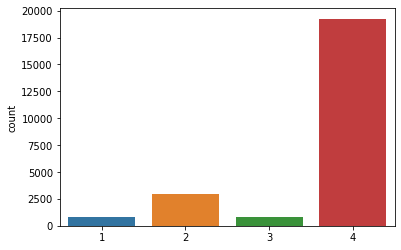

In [171]:
sns.countplot(test_predict)

#### Since train accuracy is 100% and test accuracy is 93% our model is over fitted

#### To avoid over-fitting in random forest, the main thing you need to do is optimize
#### a tuning parameter that governs the number of features that are randomly chosen 
#### to grow each tree from the bootstrapped data.


In [172]:
# StratifiedKFold  :==> Takes group information into account to avoid building folds with 
# imbalanced class distributions(for binary or multiclass classification tasks).


# https://mljar.com/blog/random-forest-overfitting/

In [173]:
# Your model should capture the variance but not unnecessary



# Why random forests overfit
# a random forest with a single tree is  like single decision tree
# a decision tree is sensitive to noise in data and can overfit
# adding more trees will help reducing overfit but up to some point
# adding more trees will not help
# Adjusting min_samples_leaf is pruning trees and if min_samples_leaf is less means it can
# Capture noise
# But in our case low min_samples_leaf is giving better accuracy on Cross Validation set


#### We will do K fold cross validation and grid search to find optimal Parameters

In [174]:
# StratifiedKFold tries to do balance class distribution of data

from sklearn.model_selection import StratifiedKFold  

In [175]:
features_arr = np.array(features)
out_class_arr = np.array(output_class)


In [176]:
from sklearn.ensemble import RandomForestClassifier
#rf = RandomForestClassifier()
store_results =[]
for i in range(2,11):
    print("value of K is ", i)
    avg = 0
    skf = StratifiedKFold(n_splits=i, shuffle=True)
    for train_ind, test_ind in skf.split(features_arr, out_class_arr):
        #print(np.min(train_ind), np.max(train_ind))
        #print(np.min(test_ind), np.max(test_ind))

        #print(np.array(features_arr[train_ind]), out_class_arr[test_ind])
        

        clf = RandomForestClassifier()
        clf.fit(features_arr[train_ind],out_class_arr[train_ind])
        print("shapes train test",features_arr[train_ind].shape, features_arr[test_ind].shape)
        predictions = clf.predict(features_arr[test_ind])
        accur = accuracy_score(predictions ,out_class_arr[test_ind])
        avg+=accur
        print("accuracy:",accuracy_score(predictions ,out_class_arr[test_ind]))
    print("Average_accuracy:", avg/i)
    store_results.append([i,avg/i])
store_results_arr = np.array(store_results)

value of K is  2
shapes train test (4778, 140) (4779, 140)
accuracy: 0.875915463486085
shapes train test (4779, 140) (4778, 140)
accuracy: 0.8727501046462955
Average_accuracy: 0.8743327840661903
value of K is  3
shapes train test (6371, 140) (3186, 140)
accuracy: 0.9058380414312618
shapes train test (6371, 140) (3186, 140)
accuracy: 0.9124293785310734
shapes train test (6372, 140) (3185, 140)
accuracy: 0.9230769230769231
Average_accuracy: 0.9137814476797527
value of K is  4
shapes train test (7167, 140) (2390, 140)
accuracy: 0.9251046025104602
shapes train test (7168, 140) (2389, 140)
accuracy: 0.9317706153202177
shapes train test (7168, 140) (2389, 140)
accuracy: 0.9246546672247803
shapes train test (7168, 140) (2389, 140)
accuracy: 0.930514859773964
Average_accuracy: 0.9280111862073556
value of K is  5
shapes train test (7645, 140) (1912, 140)
accuracy: 0.9309623430962343
shapes train test (7645, 140) (1912, 140)
accuracy: 0.9440376569037657
shapes train test (7646, 140) (1911, 140)


Text(0, 0.5, 'Accuracy score')

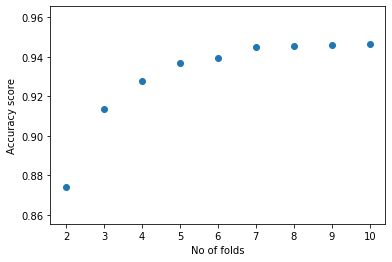

In [177]:
# Plot of Accuarcy vs no of folds

plt.scatter(store_results_arr[:,0],store_results_arr[:,1])
plt.xlabel("No of folds")
plt.ylabel("Accuracy score")

#### After 8th fold the accuracy is not varing much so take k = 8

#### Grid CV 

####  Commenting this code because it takes lot of time to run
####  I have run once and got parameters


In [178]:

'''
from sklearn.model_selection import GridSearchCV
clf1 = RandomForestClassifier(n_estimators = 500)
cv_parameters ={"max_features": np.arange(5,features.shape[1],10),
                  "min_samples_leaf" : np.arange(1,5,1), "min_samples_split" :np.arange(2,10,2)}

cvv = GridSearchCV(clf1,cv_parameters )
cvv.get_params().keys()
cvv.fit(train_xxx,train_yyy)
'''

'\nfrom sklearn.model_selection import GridSearchCV\nclf1 = RandomForestClassifier(n_estimators = 500)\ncv_parameters ={"max_features": np.arange(5,features.shape[1],10),\n                  "min_samples_leaf" : np.arange(1,5,1), "min_samples_split" :np.arange(2,10,2)}\n\ncvv = GridSearchCV(clf1,cv_parameters )\ncvv.get_params().keys()\ncvv.fit(train_xxx,train_yyy)\n'

In [179]:
#cvv.best_estimator_

In [180]:
'''
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=95,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
                       
'''

"\nRandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,\n                       criterion='gini', max_depth=None, max_features=95,\n                       max_leaf_nodes=None, max_samples=None,\n                       min_impurity_decrease=0.0, min_impurity_split=None,\n                       min_samples_leaf=1, min_samples_split=2,\n                       min_weight_fraction_leaf=0.0, n_estimators=500,\n                       n_jobs=None, oob_score=False, random_state=None,\n                       verbose=0, warm_start=False)\n                       \n"

In [181]:
#cvv.best_params_

In [182]:
'''{'max_features': 95, 'min_samples_leaf': 1}'''

"{'max_features': 95, 'min_samples_leaf': 1}"

In [183]:
#cvv.best_score_

In [184]:
'''0.9411379986919556'''    ### On 20% of test data

'0.9411379986919556'

###   So we have k fold as 7, max_feature = 95,
###   min_sample_leaf =1, no of random forest 500 on safer side

### 2nd Model

In [192]:
from sklearn.model_selection import train_test_split
train_xxxx, CV_xxxx, train_yyyy, CV_yyyy = train_test_split(features, output_class, test_size =1/7) 

In [193]:
from sklearn.ensemble import RandomForestClassifier
rf1 = RandomForestClassifier(n_estimators= 500,max_features = 95,min_samples_leaf =1, random_state=10)
rf1.fit(train_xxxx,train_yyyy)
train_predictions = rf1.predict(train_xxxx)
CV_predictions = rf1.predict(CV_xxxx)
(CV_predictions==CV_yyyy).value_counts()/CV_yyyy.shape[0]

True     0.975842
False    0.024158
Name: Target, dtype: float64

In [194]:
pred_test_data = rf1.predict(inp_test_data)
np.bincount(pred_test_data)

array([    0,   971,  3465,  1176, 18244], dtype=int64)

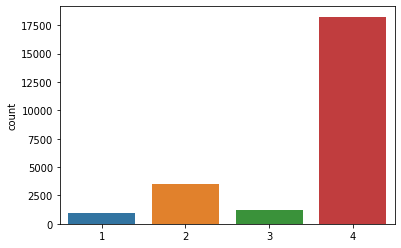

In [195]:
sns.countplot(pred_test_data)

### 3rd Model

#### Train On whole train set

In [196]:
from sklearn.ensemble import RandomForestClassifier
rf2 = RandomForestClassifier(n_estimators= 500,max_features = 95,min_samples_leaf =1, random_state=10)
rf2.fit(features,output_class)
train_predictions = rf2.predict(features)
print("Train Accuracy")
(train_predictions==output_class).value_counts()/output_class.shape[0]


Train Accuracy


True    1.0
Name: Target, dtype: float64

In [197]:
# TEst Prediction 

test_predictions = rf2.predict(inp_test_data)
np.bincount(test_predictions)

array([    0,  1016,  3436,  1220, 18184], dtype=int64)

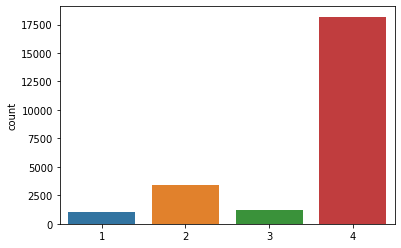

In [198]:
# Plot

sns.countplot(test_predictions)

# ENDDDD!!!